In [29]:
#Import all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Read the dataset
df_migration = pd.read_csv('PEA03.20231017T231015.csv')
df_migration.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [3]:
#Checking the columns
df_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


In [4]:
#Shape of dataset
df_migration.shape

(1998, 7)

In [5]:
#Satistical decription of dataset
df_migration.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


In [6]:
#Checking the null values
df_migration.isnull().sum()

STATISTIC Label             0
Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
UNIT                        0
VALUE                     315
dtype: int64

In [7]:
#Filling the missing values in Value column
mean_value = df_migration['VALUE'].mean()
df_migration['VALUE'].fillna(mean_value, inplace=True)

In [8]:
#First 5 rows of dataset
df_migration.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.000000
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.200000
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.200000
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,10.856625
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,10.856625


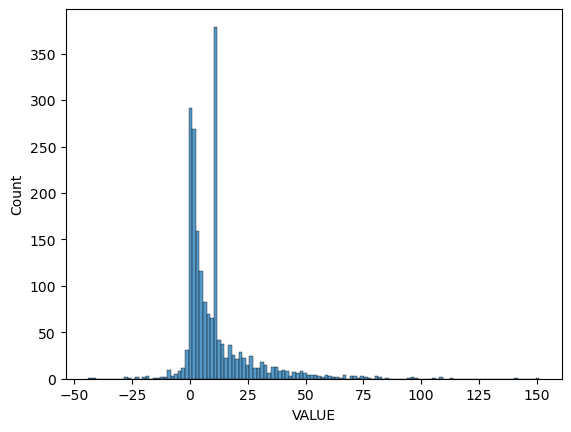

In [9]:
# Histplot for Value
sns.histplot(df_migration['VALUE'])
plt.show()

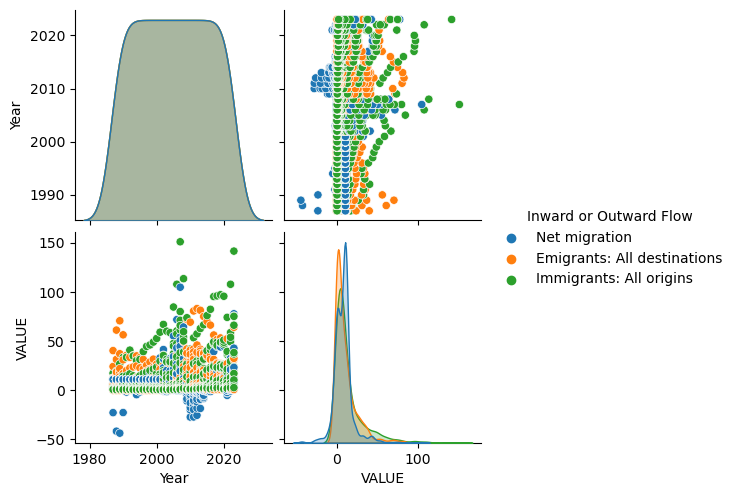

In [10]:
# Pairplot for Visualization
sns.pairplot(df_migration, hue='Inward or Outward Flow', diag_kind='kde')
plt.show()

In [11]:
#Count for Inward or Outward Flow
df_migration['Inward or Outward Flow'].value_counts()

Net migration                  666
Emigrants: All destinations    666
Immigrants: All origins        666
Name: Inward or Outward Flow, dtype: int64

<AxesSubplot:xlabel='Age Group', ylabel='count'>

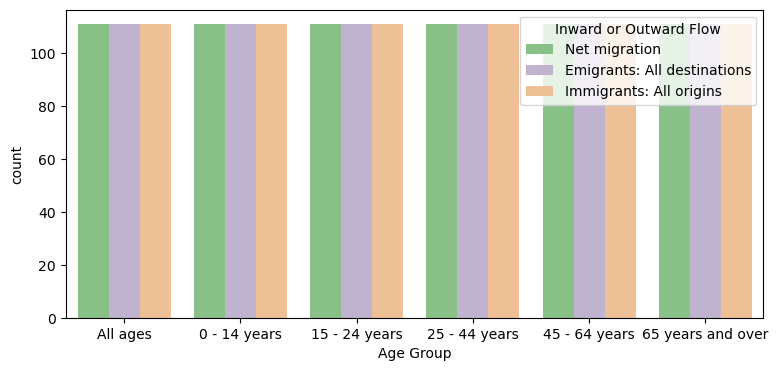

In [12]:
#Countplot for Age Group
plt.figure(figsize=(9, 4))
sns.countplot(x='Age Group', hue='Inward or Outward Flow', data=df_migration, palette='Accent')

<AxesSubplot:xlabel='Inward or Outward Flow', ylabel='count'>

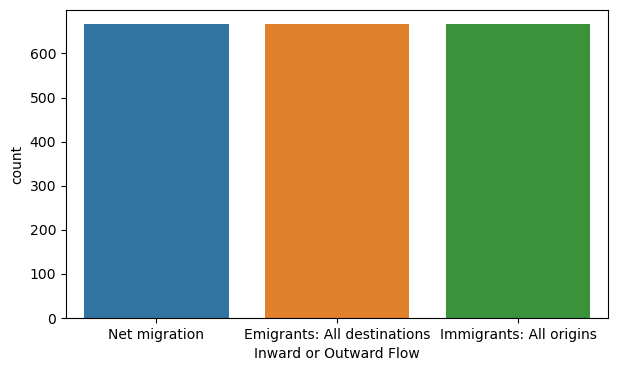

In [13]:
#Countplot for Inward or Outward Flow
plt.figure(figsize=(7, 4))
sns.countplot(x='Inward or Outward Flow', data=df_migration)



In [14]:
#Convering categorical column to numerical
le = LabelEncoder()
df_migration['STATISTIC Label'] = le.fit_transform(df_migration['STATISTIC Label'])
df_migration['Age Group'] = le.fit_transform(df_migration['Age Group'])
df_migration['Sex'] = le.fit_transform(df_migration['Sex'])
df_migration['Inward or Outward Flow'] = le.fit_transform(df_migration['Inward or Outward Flow'])
df_migration['UNIT'] = le.fit_transform(df_migration['UNIT'])


In [15]:
#First  rows of dataset
df_migration.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,0,1987,5,0,2,0,-23.000000
1,0,1987,5,0,0,0,40.200000
2,0,1987,5,0,1,0,17.200000
3,0,1987,5,2,2,0,10.856625
4,0,1987,5,2,0,0,10.856625


<AxesSubplot:>

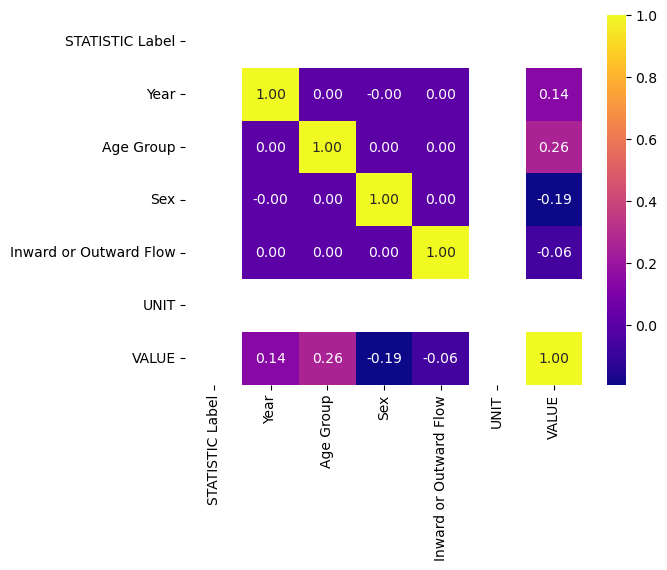

In [16]:
#Correlation heat map
correlation_matrix = df_migration.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")